In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = r"C:\Users\dell\Desktop\Full cleand fifa players 2.csv"
df = pd.read_csv(file_path)

In [ ]:
# Selecting the target variable and encoding it
target_variable_nb = 'Foot'
label_encoder = LabelEncoder()
df['Foot_Encoded'] = label_encoder.fit_transform(df[target_variable_nb])

In [ ]:
# Selecting features for the Naive Bayes classifier
# Choosing a mix of numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Pace')  # Removing 'Pace' as it was used in the previous model
features_nb_binary = numerical_features + ['AcceleRATE', 'Att/Def. WR']  # Including some categorical features

In [ ]:
# Preparing the data for the model
X = df[features_nb_binary]
y = df['Foot_Encoded']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Creating a preprocessing pipeline for Naive Bayes
preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), ['AcceleRATE', 'Att/Def. WR'])
    ])

In [ ]:
# Creating the Naive Bayes pipeline
nb_pipeline_binary = Pipeline(steps=[('preprocessor', preprocessor_nb),
                                     ('classifier', GaussianNB())])

In [ ]:
# Training the Naive Bayes classifier
nb_pipeline_binary.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Player ID', 'Skill Moves',
                                                   'Weak Foot', 'Age',
                                                   'Acceleration',
                                                   'Sprint Speed', 'Shooting',
                                                   'Positioning', 'Finishing',
                                                   'Shot Power', 'Long Shots',
                                                   'Volleys', 'Penalties',
                                                   'Passing', 'Vision',
                                                   'Crossing', 'FK Accuracy',
                                                   'Short Passing',
                                                   'Long Passing', 'Curve',
                                                   'Dribbling', 'Agility',
                                                   'Balance', 'Reactions',
                                                   'Ball Control',
                                                   'Dribbling_2', 'Composure',
                                                   'Defending', 'Interceptions',
                                                   'Heading Accuracy', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['AcceleRATE',
                                                   'Att/Def. WR'])])),
                ('classifier', GaussianNB())])

In [ ]:
# Making predictions and evaluating the model
y_pred_binary = nb_pipeline_binary.predict(X_test)
accuracy_binary = accuracy_score(y_test, y_pred_binary)

In [ ]:
# Printing the accuracy
print("Accuracy of the Naive Bayes classifier:", accuracy_binary)

Accuracy of the Naive Bayes classifier: 0.7401315789473685


In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

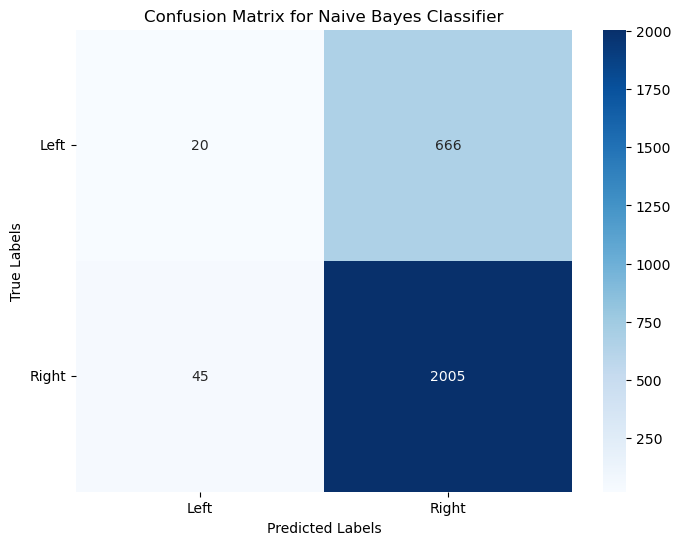

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=label_encoder.classes_)
plt.yticks(ticks=[0.5, 1.5], labels=label_encoder.classes_, rotation=0)
plt.show()